# Proyecto Final: Modelo de Regresión Lineal Uni-variable

**Curso:** Ciencia de Datos en Python

**Catedrático:** Ing. Luis Leal

**Estudiante:** Dany Rafael Díaz Lux (21000864)

**Fecha de entrega:** Sábado, 03 de abril de 2021

### Importar numpy y cargar datos

In [12]:
# Importar NumPy
import numpy as np

# Cargar matriz de datos
datosCasas = np.load('proyecto_training_data.npy')

### Definir variables iniciales, datos de entrenamiento e importar seaborn, natplotlib y pandas

In [13]:
# Definiendo porcentaje de datos para entrenamiento
porcentajeEntrenamiento = 0.8
limiteEntrenamiento = int(datosCasas.shape[0] * porcentajeEntrenamiento)
datosEntrenamiento = datosCasas[:limiteEntrenamiento,]
datosValidacion = datosCasas[limiteEntrenamiento:,]

In [44]:
# Importar seaborn
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd

### Calcular valores estadísticos y crear histogramas para todas las variables

Datos de variable: Precio de venta
Promedio: 
180590.28
Valor máximo: 
755000.0
Valor mínimo: 
34900.0
Rango: 
720100.0
Desviación estándar: 
78781.95



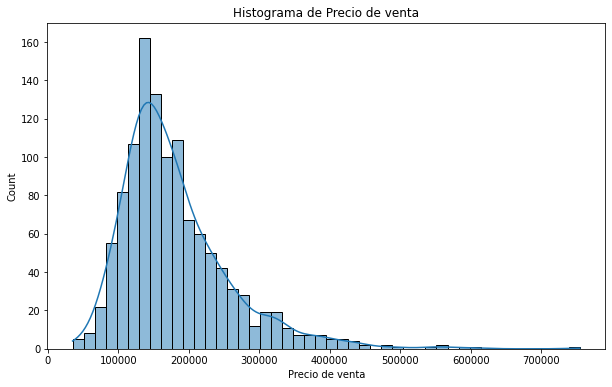

Datos de variable: Calidad General
Promedio: 
6.1
Valor máximo: 
10.0
Valor mínimo: 
1.0
Rango: 
9.0
Desviación estándar: 
1.38



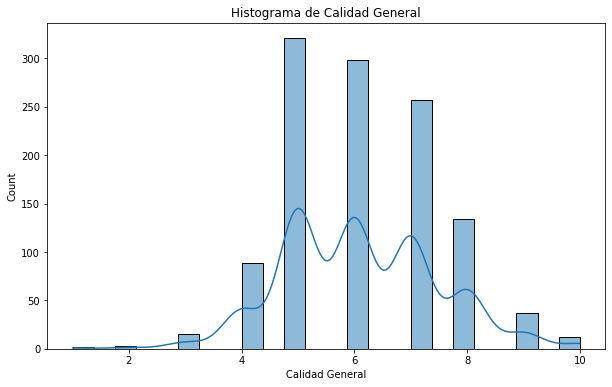

Datos de variable: Pies cuadrados de primer piso
Promedio: 
1156.32
Valor máximo: 
3228.0
Valor mínimo: 
334.0
Rango: 
2894.0
Desviación estándar: 
373.62



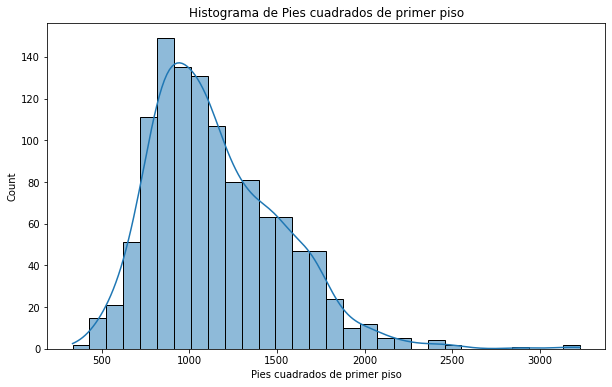

Datos de variable: Total de habitaciones sobre el nivel
Promedio: 
6.49
Valor máximo: 
14.0
Valor mínimo: 
2.0
Rango: 
12.0
Desviación estándar: 
1.61



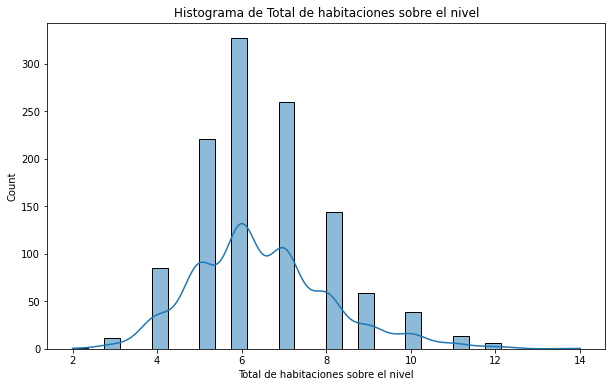

Datos de variable: Año de construcción
Promedio: 
1971.45
Valor máximo: 
2010.0
Valor mínimo: 
1875.0
Rango: 
135.0
Desviación estándar: 
29.94



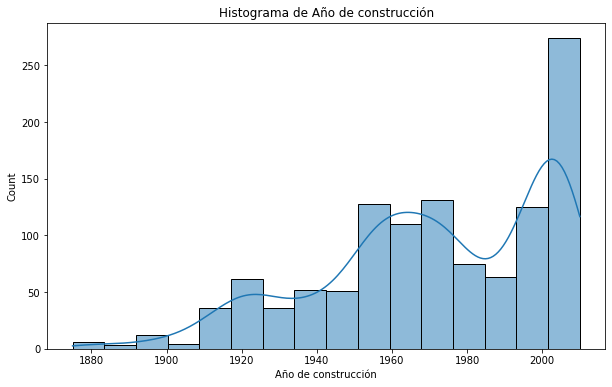

Datos de variable: Pies de calle conectados a propiedad
Promedio: 
69.95
Valor máximo: 
313.0
Valor mínimo: 
21.0
Rango: 
292.0
Desviación estándar: 
23.47



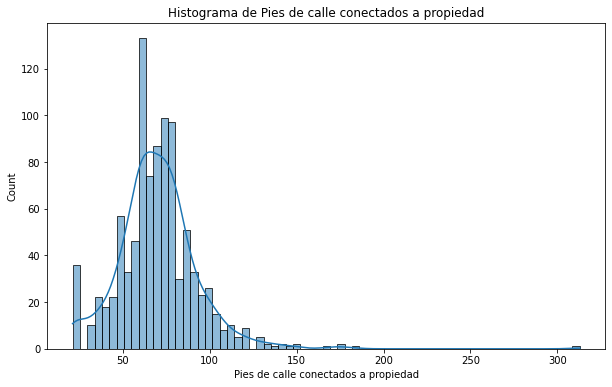

In [71]:
# Vector con los nombres de las variables en datos de entrenamiento
nombresVariables = np.array(['Precio de venta', 'Calidad General', 'Pies cuadrados de primer piso', 'Total de habitaciones sobre el nivel',
                            'Año de construcción', 'Pies de calle conectados a propiedad'])

# Calcular media, valor máximo, valor mínimo, rango y desviación estándar de cada variable
# Crear un histograma con cada variable
for iVar in range(len(nombresVariables)):
    print('Datos de variable: ' + nombresVariables[iVar])
    varVector = datosEntrenamiento[:,iVar]
    print('Promedio: ')
    print(round(np.nanmean(varVector),2))
    print('Valor máximo: ')
    print(np.nanmax(varVector))
    print('Valor mínimo: ')
    print(np.nanmin(varVector))
    print('Rango: ')
    print(np.nanmax(varVector) - np.nanmin(varVector))
    print('Desviación estándar: ')
    print(round(np.nanstd(varVector),2))
    print('')
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Histograma de ' + nombresVariables[iVar])
    varVector = pd.Series(varVector, name=nombresVariables[iVar])
    sns.histplot(varVector, kde=True)
    plt.show()

### Crear diagramas de dispersión y calcular coeficiente de correlación teniendo como variable dependiente al precio de venta

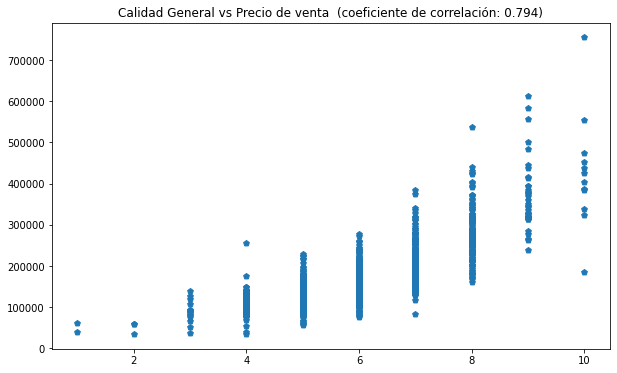

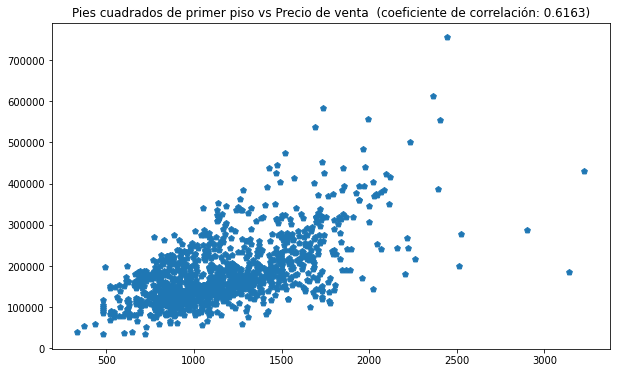

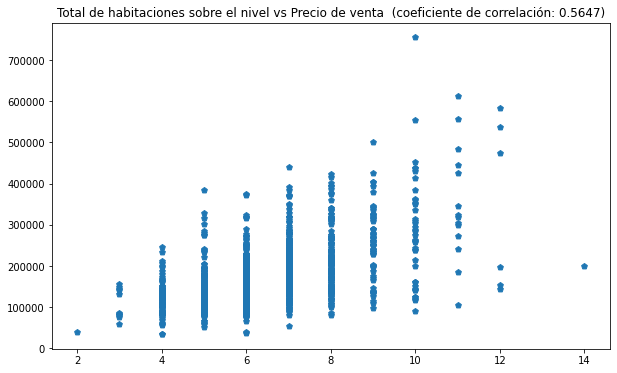

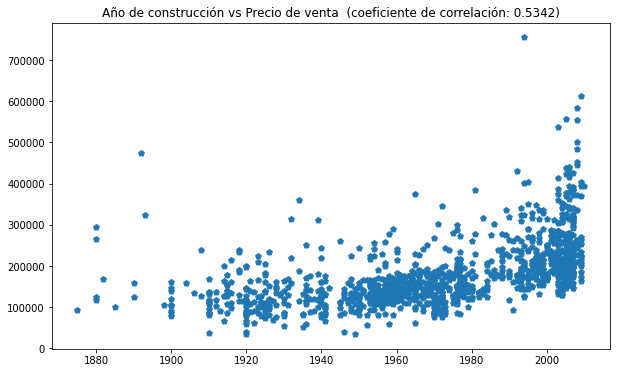

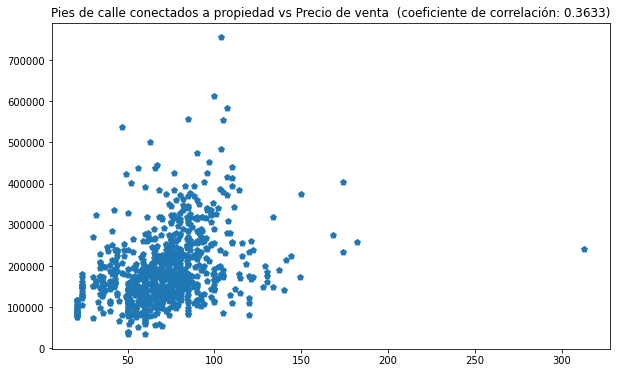

In [106]:
# Realizar gráficas de dispersión con la variable de precio de venta como variable dependiente.
# Mostrar coeficiente de correlación como parte del título de la gráfica
for iVar in range(1, len(nombresVariables)):
    varVector = datosEntrenamiento[:,iVar]
    varDep = datosEntrenamiento[:,0]
    df = pd.DataFrame(datosEntrenamiento[:,[0,iVar]])
    coef = round(df.corr()[0][1],4)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(nombresVariables[iVar] + ' vs ' + nombresVariables[0] + '  (coeficiente de correlación: ' + str(coef) + ')')
    ax.scatter(varVector, varDep, marker='p')
    plt.show()
    print('')

### Elección de 2 variables con más potencial predictivo
Basado en las gráficas anteriores las dos variables con mayor potencial predictivo (que tienen mayor coeficiente de correlación) son:

* **Calidad general de casa**: Número de 1 a 10 que indica la calidad final de una casa. (Coeficiente de correlación: 0.794)
* **Pies cuadrados de primer piso**: Número real que indica los pies cuadrados del primer piso de la casa. (Coeficiente de correlación: 0.6163)

### Función para entrenar modelo de regresión lineal

In [240]:
# Definición de función para modelo de regresión lineal
def entrenarModeloRegresionLineal(x, y, epochs = 100, imprimir_error_cada = 10, lr = 0.001):
    # Vector de errores
    vError = np.zeros(epochs)
    eModelo = np.zeros((epochs,2))
    # Crear matriz que contenga como primera columna el vector x y como segunda columna llena de valores uno
    matrizX = np.array([x,np.ones_like(x)])
    # Vector m, b
    vectorMb = np.array([0,0])
    # Empezar ciclo
    for i in range(epochs):
        # Calcular vector y_hat = m * x + b
        y_hat = np.matmul(vectorMb, matrizX)
        error = np.mean(np.power(y - y_hat,2)) * 0.5
        vGradiente = np.mean((y_hat - y) * matrizX, axis=1)
        vectorMb = vectorMb - lr * vGradiente
        vError[i] = error
        eModelo[i] = vectorMb
        if (i + 1) % imprimir_error_cada == 0:
            print('Error en iteración', i+1, ':', round(vError[i],3))
        
    return eModelo, vError

### Función para graficar error

In [241]:
# Definición de función que graficará el vector de errores
def graficarError(errores):
    iteraciones = np.array(range(1,len(errores)+1))
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Errores en iteraciones')
    ax.set_xlabel('Número de iteraciones')
    ax.set_ylabel('Error de modelo')
    ax.plot(iteraciones, errores)
    plt.show()

### Función para graficar modelos junto a datos originales

In [329]:
def graficarModelos(eModelo, n = 1, x = None, y = None, xLabel = '', yLabel = ''):
    # Inicializar figura y axe
    modeloFinal = eModelo[eModelo.shape[0]-1,]
    mFinal = round(modeloFinal[0], 3)
    signo = '+'
    if modeloFinal[1] < 0:
        signo = '-'
    bFinal = abs(round(modeloFinal[1], 3))
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title("Evolución de modelo - Modelo final: y = " + str(mFinal) + "x " + signo + " " + str(bFinal))
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    # Inicializar parámetros para gráfica
    minimoX = -5
    maximoX = 100
    # Si hay vectores x y "y", graficar puntos
    if x is not None and y is not None:
        ax.scatter(x, y)
        minimoX = np.nanmin(x) - (np.ptp(x) / 5)
        maximoX = np.nanmax(x) + (np.ptp(x) / 5)
    
    vX = np.linspace(minimoX, maximoX, 100)
    for i in range(0, eModelo.shape[0] - n + 1, n):
        vY = vX * eModelo[i+n-1,0] + eModelo[i+n-1,1]
        ax.plot(vX,vY, label='Modelo en interación ' + str(i+n))
        ax.legend()
    
    plt.show()

### Utilizar Funciones para encontrar modelo lineal en variables independientes elegidas

### Calidad general de casa

#### Error y Modelo generado

Error en iteración 200 : 4372570576.945
Error en iteración 400 : 1723233508.214
Error en iteración 600 : 1254301195.775
Error en iteración 800 : 1168580371.344
Error en iteración 1000 : 1151881628.602
Error en iteración 1200 : 1148251720.602
Error en iteración 1400 : 1147333098.595
Error en iteración 1600 : 1147060709.825
Error en iteración 1800 : 1146969380.492
Error en iteración 2000 : 1146936373.692


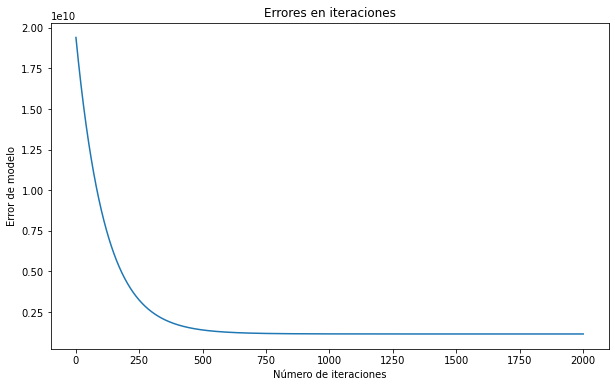

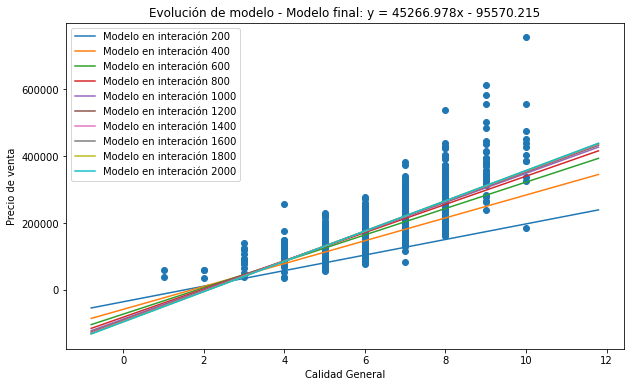

In [330]:
numIteraciones = 2000
cadaNiteraciones = numIteraciones // 10
learningRate = 0.0498
iInd = 1
iDep = 0
vInd = datosEntrenamiento[:,iInd]
vDep = datosEntrenamiento[:,iDep]
nomInd = nombresVariables[iInd]
nomDep = nombresVariables[iDep]
eModelo, vError = entrenarModeloRegresionLineal(x = vInd, y = vDep, \
                                 epochs = numIteraciones, imprimir_error_cada = cadaNiteraciones, lr = learningRate)
graficarError(vError)
graficarModelos(eModelo, n = cadaNiteraciones, x = vInd, y = vDep, xLabel = nomInd, yLabel = nomDep)

### Pies cuadrados de primer piso

#### Error y Modelo generado

Error en iteración 100 : 1968093129.862
Error en iteración 200 : 1968090960.805
Error en iteración 300 : 1968089892.601
Error en iteración 400 : 1968088824.423
Error en iteración 500 : 1968087756.272
Error en iteración 600 : 1968086688.147
Error en iteración 700 : 1968085620.048
Error en iteración 800 : 1968084551.976
Error en iteración 900 : 1968083483.929
Error en iteración 1000 : 1968082415.909


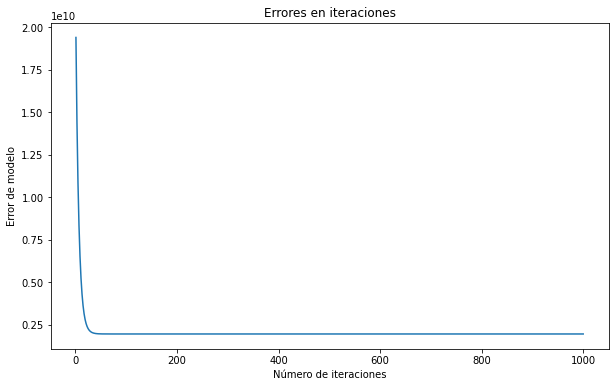

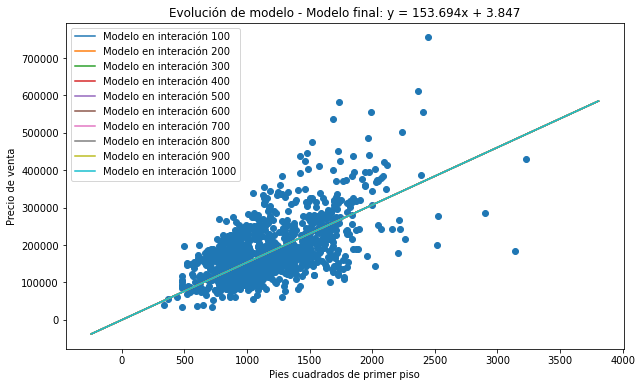

In [331]:
numIteraciones = 1000
cadaNiteraciones = numIteraciones // 10
learningRate = 0.0000013
iInd = 2
iDep = 0

vInd = datosEntrenamiento[:,iInd]
vDep = datosEntrenamiento[:,iDep]
nomInd = nombresVariables[iInd]
nomDep = nombresVariables[iDep]
eModelo, vError = entrenarModeloRegresionLineal(x = vInd, y = vDep, \
                                 epochs = numIteraciones, imprimir_error_cada = cadaNiteraciones, lr = learningRate)
graficarError(vError)
graficarModelos(eModelo, n = cadaNiteraciones, x = vInd, y = vDep, xLabel = nomInd, yLabel = nomDep)